# Auto-Isurance Fraud Detection

-> Credit: Rejesh Kalavala 
-> Data source: https://www.kaggle.com/datasets/buntyshah/auto-insurance-claims-data

### Problem Statement:
The objective of this project is to analyze the auto insurance claims data and develop a predictive model to identify fraudulent claims. The dataset contains information about the insured vehicles and policyholders, including the accident details, vehicle information, and claim amount.
Fraud identification:
Fraudulent claims are a significant problem for insurance companies as they can result in significant financial losses. In this dataset, fraudulent claims can be identified based on various factors such as:
Claim amount: Fraudulent claims may involve an excessive claim amount that is significantly higher than the actual loss or damage caused by the accident.
Accident details: Fraudulent claims may involve accidents that seem suspicious or have inconsistent details, such as accidents that occur in remote or high-risk areas, accidents involving multiple vehicles with inconsistent damage, or accidents that occur at unusual times.
Vehicle information: Fraudulent claims may involve vehicles that have previously been involved in accidents or have a history of fraudulent claims.
Policyholder information: Fraudulent claims may involve policyholders who have a history of submitting fraudulent claims or have recently purchased the policy.
By analyzing these factors and building a predictive model, we can identify potentially fraudulent claims and reduce the financial losses for the insurance company.

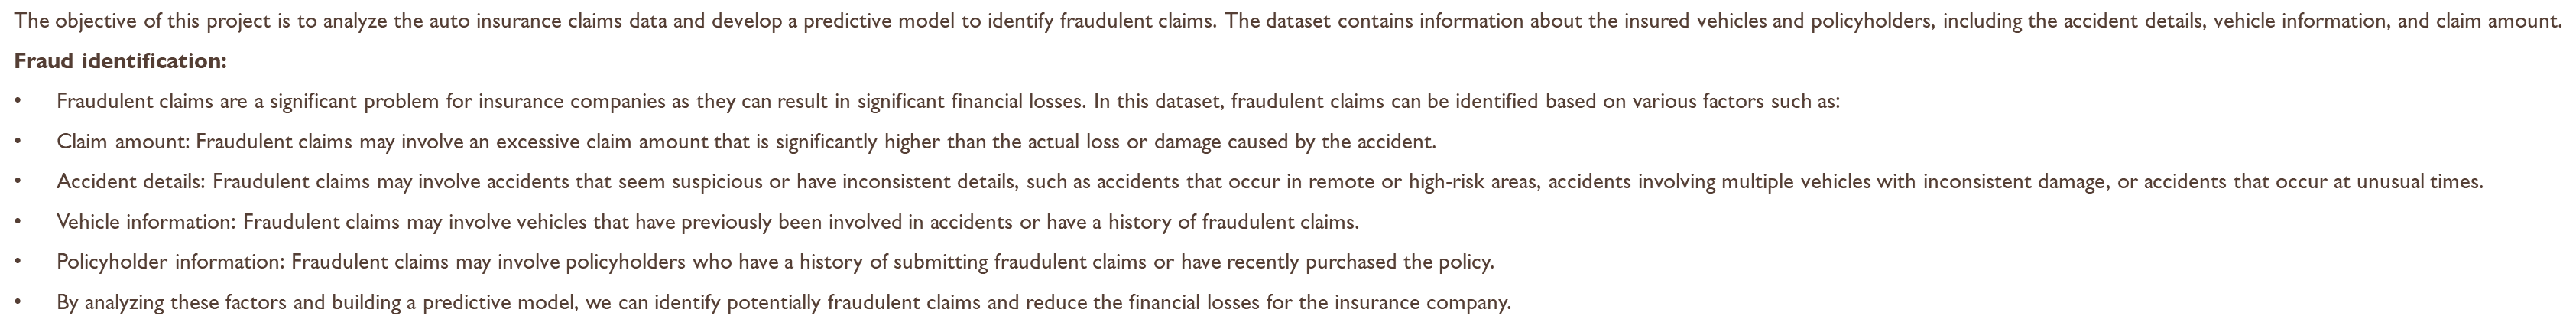

In [4]:
## Required Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

## 1- Data Ingestion:

In [5]:
df = pd.read_csv('./DataSet/insurance_claims.csv')
df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [6]:
'''
You need to explain all the 40 columns. in tabular format
'''


'\nYou need to explain all the 40 columns. in tabular format\n'

## 2- Data Cleaning:

In [7]:
df.replace('?', np.nan, inplace = True) # replacing '?' with 'nan' value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [9]:
# missing values
df.isna().sum() / len(df) * 100

months_as_customer               0.0
age                              0.0
policy_number                    0.0
policy_bind_date                 0.0
policy_state                     0.0
policy_csl                       0.0
policy_deductable                0.0
policy_annual_premium            0.0
umbrella_limit                   0.0
insured_zip                      0.0
insured_sex                      0.0
insured_education_level          0.0
insured_occupation               0.0
insured_hobbies                  0.0
insured_relationship             0.0
capital-gains                    0.0
capital-loss                     0.0
incident_date                    0.0
incident_type                    0.0
collision_type                  17.8
incident_severity                0.0
authorities_contacted            0.0
incident_state                   0.0
incident_city                    0.0
incident_location                0.0
incident_hour_of_the_day         0.0
number_of_vehicles_involved      0.0
p

# EDA: Pre-processing

### Step 1: Explain the intended histogram:
Navigating through the data set and compute the count per age category

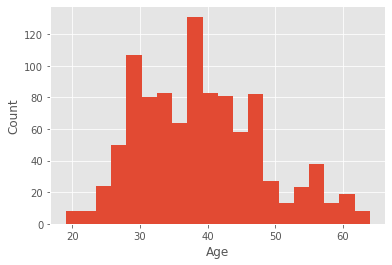

In [10]:
#Age Distribution
plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Step 2: Diving deeper into the incident severity types 


In [11]:
# Listing all the uniue inputs within incident_severity
print(df['incident_severity'].unique())

['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']


In [12]:
## we may concatentae the two columns inputs 
df2 = pd.concat([df['incident_severity'], df['policy_annual_premium']]).unique()
print(df2)

['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage' 1406.91
 1197.22 1413.14 1415.74 1583.91 1351.1 1333.35 1137.03 1442.99 1315.68
 1253.12 1137.16 1215.36 936.61 1301.13 1131.4 1199.44 708.64 1374.22
 1475.73 1187.96 875.15 972.18 1268.79 883.31 1266.92 1322.1 848.07 1291.7
 1104.5 954.16 1337.28 1088.34 1558.29 1415.68 1334.15 988.45 1222.48
 1155.55 1262.08 1451.62 1737.66 1475.93 538.17 1081.08 1454.43 1240.47
 1273.7 1123.87 1245.89 1326.62 1073.83 1530.52 1201.41 1393.57 1276.57
 1082.49 1414.74 1470.06 870.63 795.23 1168.2 993.51 1848.81 1641.73
 1362.87 1239.22 835.02 1061.33 1279.08 1105.49 1055.53 895.83 1632.93
 1405.99 1425.54 1038.09 1307.11 1489.24 976.67 1340.43 1267.81 1234.2
 1318.06 769.95 1514.72 873.64 1612.43 1318.24 1226.83 1326.44 1136.83
 1322.78 1483.25 1515.3 1075.18 1690.27 1352.83 1148.73 969.5 1463.82
 1474.17 1497.35 1427.14 1495.1 1141.62 1125.37 1207.36 1338.5 1074.07
 1337.56 1298.91 1222.75 1059.52 1124.38 1110.37 1103.58 1269.76 964.79
 1167

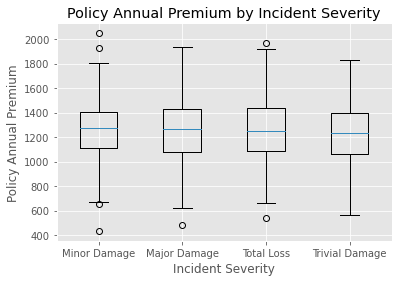

In [13]:
plt.boxplot([df[df["incident_severity"]=="Minor Damage"]["policy_annual_premium"],
             df[df["incident_severity"]=="Major Damage"]["policy_annual_premium"],
             df[df["incident_severity"]=="Total Loss"]["policy_annual_premium"],
             df[df["incident_severity"]=="Trivial Damage"]["policy_annual_premium"]],
            labels=["Minor Damage", "Major Damage", "Total Loss", "Trivial Damage"])
plt.title("Policy Annual Premium by Incident Severity")
plt.xlabel("Incident Severity")
plt.ylabel("Policy Annual Premium")
plt.show()

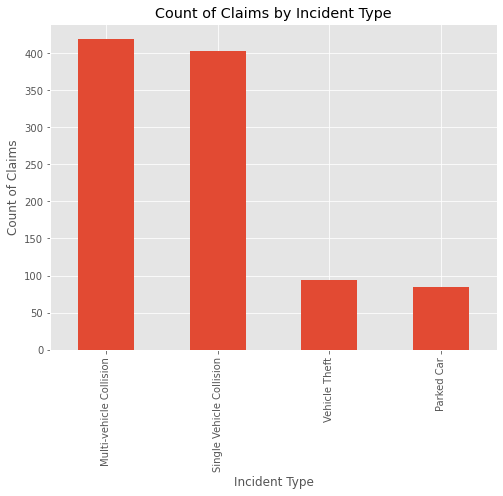

In [14]:
plt.figure(figsize=(8,6))
df['incident_type'].value_counts().plot(kind='bar')
plt.title('Count of Claims by Incident Type')
plt.xlabel('Incident Type')
plt.ylabel('Count of Claims')
plt.show()

# Missing Value Adjustment

In [15]:
### Calculating the corresponding means per collision_type, property_damage, and police_report_available
#mean_of_collision_type = df['collision_type'].mean()
#mean_of_property_damage = df['property_damage'].mean()
#mean_of_police_report_available = df['police_report_available'].mean()'
mean_of_property_claim = df['property_claim'].mean()
mean_of_property_claim

7399.57

In [16]:
df['property_claim'] = df['property_claim'].fillna(value=mean_of_property_claim)

In [17]:
## since we haven't encoded the object types into numerical, we opt for mode as a solution to rectify the missing values 
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [18]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [19]:
df['property_claim']

0      13020
1        780
2       3850
3       6340
4        650
       ...  
995     8720
996    18080
997     7500
998     5220
999      920
Name: property_claim, Length: 1000, dtype: int64

### Step 3: Finding feature Correlation

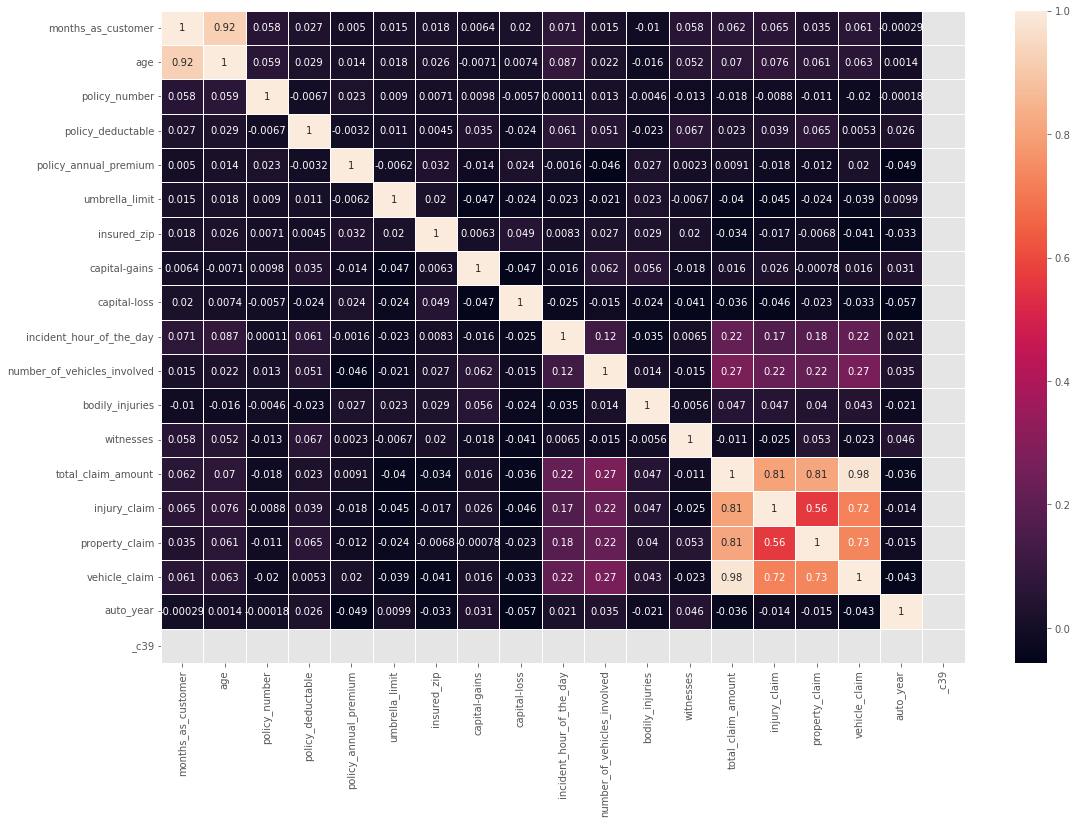

In [20]:
# heatmap

plt.figure(figsize = (18, 12))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [21]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [22]:
## Create a function that returns the list of all the most relevant columns as per responsiveness to a model treshhold 
def columns_selection(dataframe):
    '''
    Selecting only columns that are having >10 unique values 
    '''
    ## Preparing the dataframe 
    ## converting the nunique output to a dataframe 
    output = pd.DataFrame(dataframe.nunique())
    output.reset_index(inplace=True)
    output.columns = ["features","counts"]
    ## making a list of relevant columns 
    col_list = []
    final_columns = []
    ## Process section: Making an iteratable list
    mycounts = output["counts"].values.tolist()
    for value in mycounts:
        if (value < 10):
            col_list.append(output[output.counts.isin([value,])]) 
    ## Output Section
    return col_list

In [23]:
## previewing the list of relevant columns 
columns_selection(df)

[             features  counts
 4        policy_state       3
 5          policy_csl       3
 6   policy_deductable       3
 19     collision_type       3
 28    bodily_injuries       3,
              features  counts
 4        policy_state       3
 5          policy_csl       3
 6   policy_deductable       3
 19     collision_type       3
 28    bodily_injuries       3,
              features  counts
 4        policy_state       3
 5          policy_csl       3
 6   policy_deductable       3
 19     collision_type       3
 28    bodily_injuries       3,
                    features  counts
 10              insured_sex       2
 27          property_damage       2
 30  police_report_available       2
 38           fraud_reported       2,
                    features  counts
 11  insured_education_level       7
 22           incident_state       7
 23            incident_city       7,
                 features  counts
 14  insured_relationship       6,
                        features  c

### What is the becnhmarking treshhold to remove columns rom the datasets

In [24]:
# dropping columns which are not necessary for prediction

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
    'insured_hobbies','auto_make','auto_model','auto_year', '_c39']

df.drop(to_drop, inplace = True, axis = 1)

### Using Plotly Dash to locate the claims per map

In [40]:
import plotly.express as px
import plotly.graph_objects as go

## Plotting the map
geojson = px.data.election_geojson()
fig = px.choropleth(
        df, geojson=geojson, color='incident_state',
        locations='incident_city', featureidkey="properties.incident_state",
        projection="mercator", range_color=[0, 6500])

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    
# return the figure
fig.show()

In [41]:
print(f'shape of dataset: {df.shape}')
df.head()

shape of dataset: (1000, 29)


,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,N


### define the technical urge to use the multicollinearity

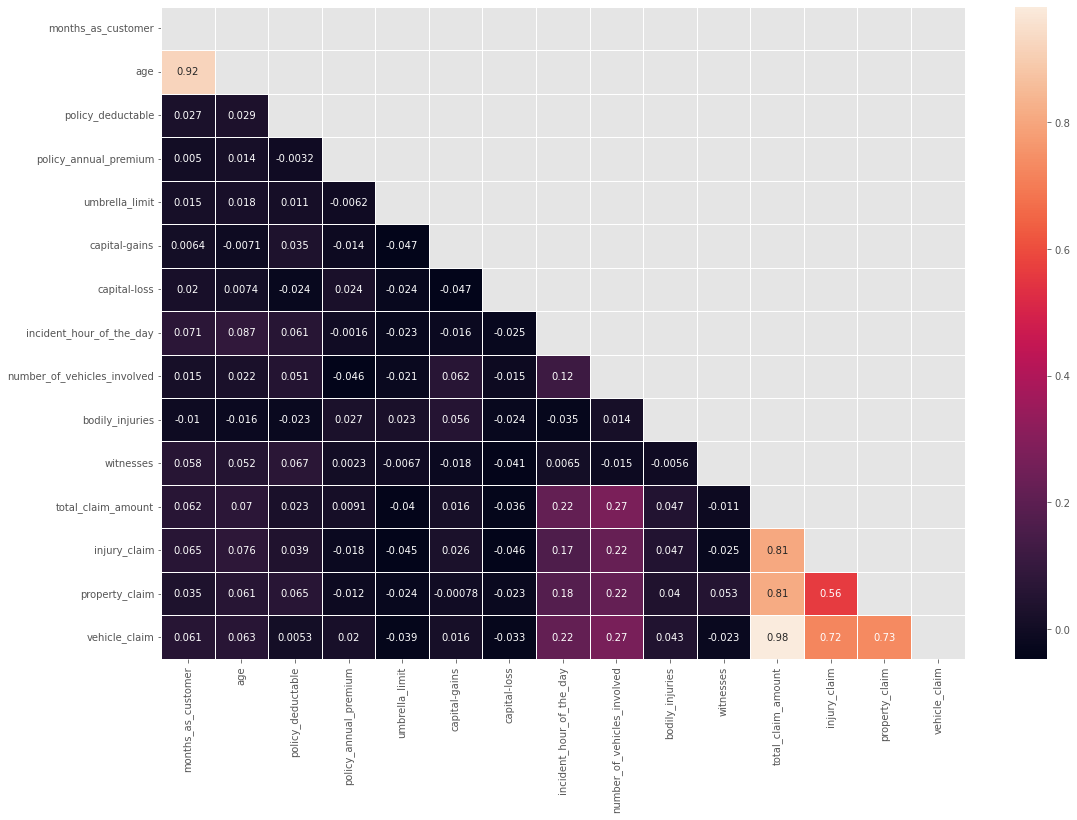

In [42]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [43]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,1300,650,4550,N


## defining the response variable 

In [44]:
# separating the feature and target columns

X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [45]:
y = y.map({'Y': 1, 'N': 0})    # Use map() to replace 'Y' with 1 and 'N' with 0

In [46]:
# Split columns into numerical and categorical
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

### Visualizing numerical columns 

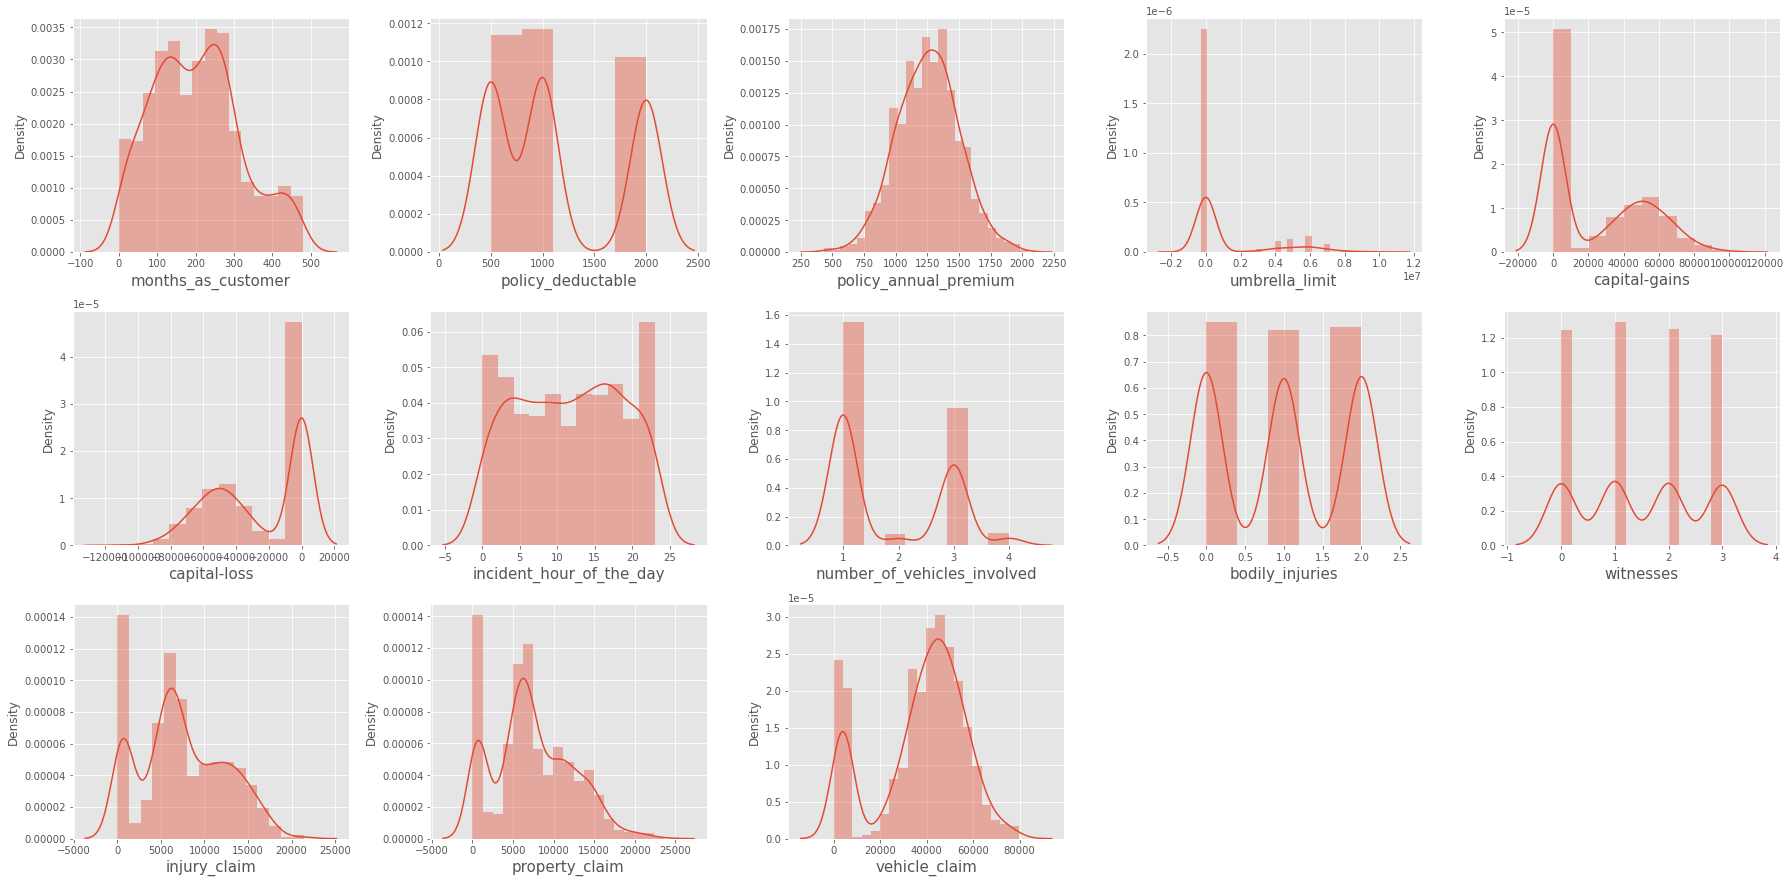

In [47]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in num_cols:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

# Outliers Detection

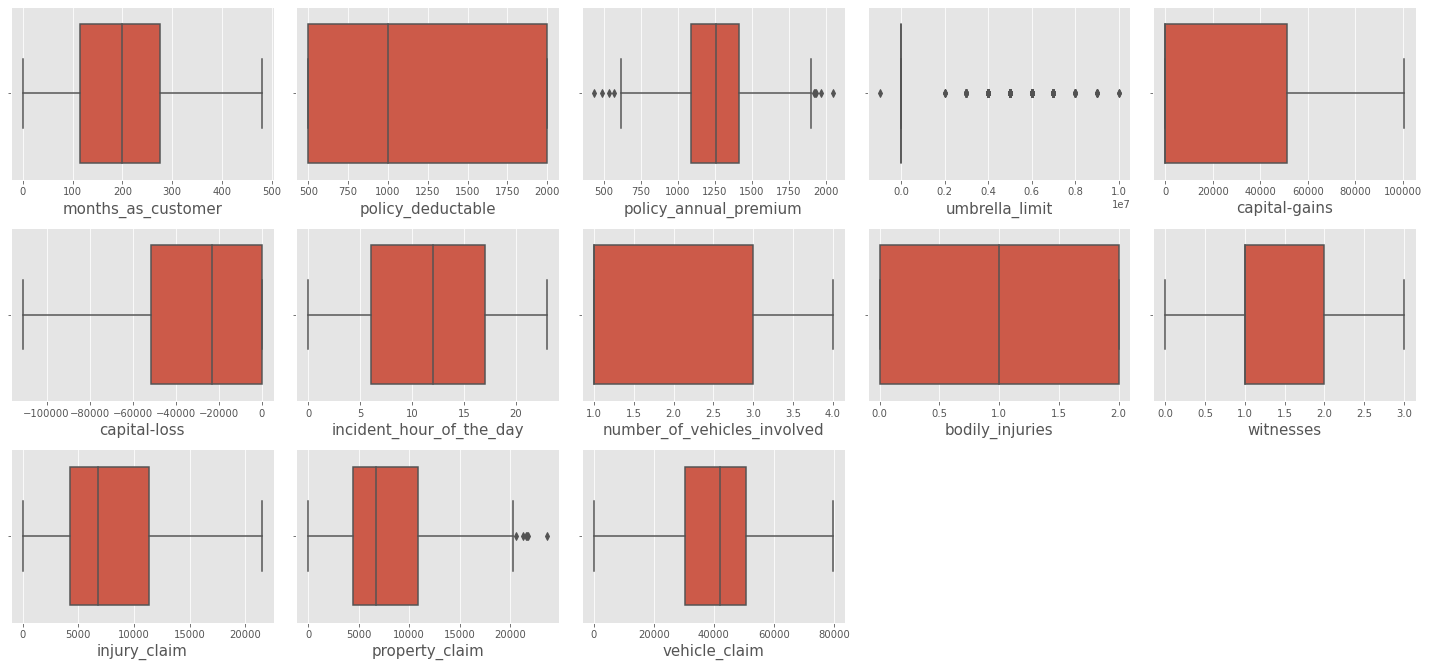

In [48]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in num_cols:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [50]:
from sklearn.preprocessing import StandardScaler

def scale_and_encode(df):
    # Split columns into numerical and categorical
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    # Standardize numerical columns
    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])
    
    # One-hot encode categorical columns
    df = pd.get_dummies(df, columns=cat_cols,drop_first = True)
    
    return df

## Converting categoirical data into quantitive data 

In [51]:
X = scale_and_encode(X)
X.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_YES,police_report_available_YES
0,1.078140,-0.222383,0.616705,-0.479476,1.011331,0.953851,-0.956261,-0.823865,0.009759,0.461838,-0.189283,1.165505,0.749653,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1
1,0.208995,1.412784,-0.242521,1.697980,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,-1.338700,-1.363822,-1.372696,-1.823346,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,-0.608002,1.412784,0.642233,1.697980,0.358023,0.953851,-0.668404,1.140056,1.229693,1.362107,0.054644,-0.736072,-0.785565,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0.452355,1.412784,0.652886,2.133471,0.853388,-1.267577,-0.956261,-0.823865,0.009759,0.461838,-0.224130,-0.219722,0.677607,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0.208995,-0.222383,1.341980,2.133471,1.467210,-0.683741,1.202666,-0.823865,-1.210174,-0.438431,-1.257232,-1.399654,-1.768252,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## Data Splitting for ML deployment 

In [53]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42,stratify=y)


# Modelling

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

In [55]:
models = {'LogisticRegression': LogisticRegression(max_iter=10000),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'SVC': SVC(),
          'GaussianNB':GaussianNB(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'XGBClassifier': XGBClassifier(),
          'CatBoostClassifier':CatBoostClassifier()}

In [56]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(0)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(model_scores,index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
    
    
    return model_scores

In [57]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)

Learning rate set to 0.009366
0:	learn: 0.6900870	total: 158ms	remaining: 2m 37s
1:	learn: 0.6866173	total: 169ms	remaining: 1m 24s
2:	learn: 0.6810030	total: 179ms	remaining: 59.6s
3:	learn: 0.6756805	total: 189ms	remaining: 47.2s
4:	learn: 0.6716954	total: 199ms	remaining: 39.7s
5:	learn: 0.6666074	total: 212ms	remaining: 35.1s
6:	learn: 0.6621550	total: 224ms	remaining: 31.8s
7:	learn: 0.6590998	total: 236ms	remaining: 29.2s
8:	learn: 0.6562432	total: 247ms	remaining: 27.2s
9:	learn: 0.6515768	total: 256ms	remaining: 25.4s
10:	learn: 0.6481843	total: 268ms	remaining: 24.1s
11:	learn: 0.6437176	total: 280ms	remaining: 23s
12:	learn: 0.6402232	total: 289ms	remaining: 22s
13:	learn: 0.6368499	total: 299ms	remaining: 21.1s
14:	learn: 0.6342145	total: 309ms	remaining: 20.3s
15:	learn: 0.6298407	total: 319ms	remaining: 19.6s
16:	learn: 0.6258777	total: 329ms	remaining: 19s
17:	learn: 0.6234955	total: 336ms	remaining: 18.3s
18:	learn: 0.6211305	total: 348ms	remaining: 17.9s
19:	learn: 0.61

170:	learn: 0.4127731	total: 2.01s	remaining: 9.74s
171:	learn: 0.4122445	total: 2.02s	remaining: 9.72s
172:	learn: 0.4117677	total: 2.03s	remaining: 9.71s
173:	learn: 0.4110015	total: 2.04s	remaining: 9.7s
174:	learn: 0.4105636	total: 2.05s	remaining: 9.68s
175:	learn: 0.4098325	total: 2.06s	remaining: 9.67s
176:	learn: 0.4094097	total: 2.08s	remaining: 9.66s
177:	learn: 0.4088142	total: 2.09s	remaining: 9.63s
178:	learn: 0.4081371	total: 2.1s	remaining: 9.62s
179:	learn: 0.4074564	total: 2.11s	remaining: 9.6s
180:	learn: 0.4065641	total: 2.12s	remaining: 9.59s
181:	learn: 0.4058248	total: 2.13s	remaining: 9.57s
182:	learn: 0.4053413	total: 2.14s	remaining: 9.56s
183:	learn: 0.4048765	total: 2.15s	remaining: 9.55s
184:	learn: 0.4039067	total: 2.16s	remaining: 9.53s
185:	learn: 0.4030985	total: 2.17s	remaining: 9.52s
186:	learn: 0.4026902	total: 2.19s	remaining: 9.53s
187:	learn: 0.4019480	total: 2.2s	remaining: 9.51s
188:	learn: 0.4015841	total: 2.21s	remaining: 9.5s
189:	learn: 0.401

329:	learn: 0.3365127	total: 3.88s	remaining: 7.88s
330:	learn: 0.3362474	total: 3.89s	remaining: 7.86s
331:	learn: 0.3357505	total: 3.9s	remaining: 7.85s
332:	learn: 0.3355173	total: 3.91s	remaining: 7.84s
333:	learn: 0.3351237	total: 3.92s	remaining: 7.82s
334:	learn: 0.3347681	total: 3.93s	remaining: 7.8s
335:	learn: 0.3343634	total: 3.94s	remaining: 7.79s
336:	learn: 0.3340021	total: 3.95s	remaining: 7.78s
337:	learn: 0.3335391	total: 3.96s	remaining: 7.76s
338:	learn: 0.3332479	total: 3.97s	remaining: 7.74s
339:	learn: 0.3327765	total: 3.98s	remaining: 7.73s
340:	learn: 0.3323648	total: 3.99s	remaining: 7.72s
341:	learn: 0.3319364	total: 4s	remaining: 7.7s
342:	learn: 0.3316096	total: 4.01s	remaining: 7.68s
343:	learn: 0.3312349	total: 4.02s	remaining: 7.67s
344:	learn: 0.3309867	total: 4.03s	remaining: 7.66s
345:	learn: 0.3306662	total: 4.04s	remaining: 7.64s
346:	learn: 0.3302879	total: 4.05s	remaining: 7.63s
347:	learn: 0.3299821	total: 4.07s	remaining: 7.62s
348:	learn: 0.3293

497:	learn: 0.2805754	total: 5.74s	remaining: 5.78s
498:	learn: 0.2803127	total: 5.75s	remaining: 5.77s
499:	learn: 0.2800587	total: 5.76s	remaining: 5.76s
500:	learn: 0.2796811	total: 5.76s	remaining: 5.74s
501:	learn: 0.2795385	total: 5.78s	remaining: 5.73s
502:	learn: 0.2792896	total: 5.79s	remaining: 5.72s
503:	learn: 0.2789604	total: 5.8s	remaining: 5.7s
504:	learn: 0.2786689	total: 5.81s	remaining: 5.69s
505:	learn: 0.2783801	total: 5.82s	remaining: 5.68s
506:	learn: 0.2781355	total: 5.83s	remaining: 5.67s
507:	learn: 0.2779142	total: 5.84s	remaining: 5.66s
508:	learn: 0.2776605	total: 5.85s	remaining: 5.64s
509:	learn: 0.2773782	total: 5.86s	remaining: 5.63s
510:	learn: 0.2769678	total: 5.87s	remaining: 5.62s
511:	learn: 0.2767068	total: 5.88s	remaining: 5.61s
512:	learn: 0.2765900	total: 5.89s	remaining: 5.59s
513:	learn: 0.2759767	total: 5.9s	remaining: 5.58s
514:	learn: 0.2756429	total: 5.91s	remaining: 5.57s
515:	learn: 0.2752612	total: 5.92s	remaining: 5.55s
516:	learn: 0.2

667:	learn: 0.2342550	total: 7.58s	remaining: 3.77s
668:	learn: 0.2339652	total: 7.59s	remaining: 3.76s
669:	learn: 0.2338087	total: 7.61s	remaining: 3.75s
670:	learn: 0.2335808	total: 7.62s	remaining: 3.73s
671:	learn: 0.2333622	total: 7.63s	remaining: 3.72s
672:	learn: 0.2331891	total: 7.64s	remaining: 3.71s
673:	learn: 0.2329351	total: 7.65s	remaining: 3.7s
674:	learn: 0.2327356	total: 7.66s	remaining: 3.69s
675:	learn: 0.2325430	total: 7.67s	remaining: 3.67s
676:	learn: 0.2323317	total: 7.68s	remaining: 3.66s
677:	learn: 0.2320662	total: 7.69s	remaining: 3.65s
678:	learn: 0.2315783	total: 7.7s	remaining: 3.64s
679:	learn: 0.2312040	total: 7.71s	remaining: 3.63s
680:	learn: 0.2308888	total: 7.72s	remaining: 3.62s
681:	learn: 0.2305699	total: 7.73s	remaining: 3.6s
682:	learn: 0.2303193	total: 7.74s	remaining: 3.59s
683:	learn: 0.2301234	total: 7.75s	remaining: 3.58s
684:	learn: 0.2298690	total: 7.76s	remaining: 3.57s
685:	learn: 0.2297292	total: 7.78s	remaining: 3.56s
686:	learn: 0.2

832:	learn: 0.1969569	total: 9.44s	remaining: 1.89s
833:	learn: 0.1967060	total: 9.45s	remaining: 1.88s
834:	learn: 0.1963614	total: 9.46s	remaining: 1.87s
835:	learn: 0.1961286	total: 9.47s	remaining: 1.86s
836:	learn: 0.1959066	total: 9.48s	remaining: 1.85s
837:	learn: 0.1956167	total: 9.49s	remaining: 1.83s
838:	learn: 0.1953987	total: 9.5s	remaining: 1.82s
839:	learn: 0.1951738	total: 9.51s	remaining: 1.81s
840:	learn: 0.1949944	total: 9.52s	remaining: 1.8s
841:	learn: 0.1948007	total: 9.54s	remaining: 1.79s
842:	learn: 0.1946234	total: 9.55s	remaining: 1.78s
843:	learn: 0.1944356	total: 9.56s	remaining: 1.77s
844:	learn: 0.1941477	total: 9.57s	remaining: 1.75s
845:	learn: 0.1938564	total: 9.58s	remaining: 1.74s
846:	learn: 0.1936347	total: 9.59s	remaining: 1.73s
847:	learn: 0.1935025	total: 9.6s	remaining: 1.72s
848:	learn: 0.1933889	total: 9.61s	remaining: 1.71s
849:	learn: 0.1931737	total: 9.62s	remaining: 1.7s
850:	learn: 0.1929660	total: 9.63s	remaining: 1.69s
851:	learn: 0.19

In [58]:
cm = sns.color_palette('PuBuGn',as_cmap=True)
score = model_scores.style.background_gradient(cmap=cm)
score

,Score
GaussianNB,0.600000
DecisionTreeClassifier,0.685000
KNeighborsClassifier,0.740000
RandomForestClassifier,0.740000
SVC,0.745000
GradientBoostingClassifier,0.765000
AdaBoostClassifier,0.775000
XGBClassifier,0.780000
LogisticRegression,0.805000
CatBoostClassifier,0.830000


In [59]:
# Convert the styled dataframe to a regular dataframe
df_score = pd.DataFrame(score.data)
df_score

,Score
GaussianNB,0.600
DecisionTreeClassifier,0.685
KNeighborsClassifier,0.740
RandomForestClassifier,0.740
SVC,0.745
GradientBoostingClassifier,0.765
AdaBoostClassifier,0.775
XGBClassifier,0.780
LogisticRegression,0.805
CatBoostClassifier,0.830


In [60]:
### Implementation of PyOD Algorithm for outlier detection 

### Deployment with the use of plotly dash 

### need to see a table where I can insert raw data and then get a response as (this fraudulent or not fraudulent claim)

Reviewing this source: https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/#:~:text=PyOD%20is%20a%20scalable%20Python,a%20single%20well%2Ddocumented%20API.

In [61]:
import pandas as pd
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [64]:
df_new = pd.read_csv('./DataSet/insurance_claims.csv')
df_new.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


## Application section: Fraud Detection App v1.0

In [65]:
%%writefile app.py

##Imporing the required libraries 
import streamlit as st'
import pandas as pd
import numpy as np

## Calling the important functions



## start the streamlit app 
def app():
    ##this is the form we should put togther 
    return 200


## Executing the app 
if __name__ == "__main__"
    app()

Writing app.py


#### Exporting all the required libraries in this project

In [ ]:
pip freeze ./requirements.txt